In [54]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime
import scipy.stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.dates as mdates
import matplotlib


In [56]:
def decimal_year_to_datetime(decimal_year):
    year = decimal_year.astype(int)
    decimal_part = decimal_year - year
    start_of_year = pd.to_datetime([f'{y}-01-01' for y in year])
    seconds_in_year = (pd.to_datetime([f'{y+1}-01-01' for y in year]) - start_of_year).total_seconds()
    seconds = decimal_part * seconds_in_year
    return start_of_year + pd.to_timedelta(seconds, unit='s')

In [161]:
decimal_year_to_date(1961.1)

datetime.date(1961, 2, 6)

In [70]:
df = pd.read_csv("NewPath1926262012.csv",header=None).drop(3, axis=1)
df.columns = ["decimal_year", "d13c","sea_level"]
df.drop_duplicates("decimal_year", keep="first", inplace=True)
df.sort_values("decimal_year", inplace=True)
df.reset_index(inplace=True, drop=True)


df['datetime'] = decimal_year_to_datetime(df['decimal_year'].values)
df.set_index("datetime", inplace=True)
#df.resample("6ME").interpolate(method="time")
df

,decimal_year,d13c,sea_level
datetime,,,
1926-01-01 00:00:00.000000000,1926.000000,-0.995698,-24.416000
1926-03-02 20:00:10.511998778,1926.166667,-0.900540,-20.788604
1926-05-02 15:59:49.488001222,1926.333333,-0.978993,-23.779221
1926-07-02 12:00:00.000000000,1926.500000,-1.217134,-32.857139
1926-09-01 08:00:10.511998780,1926.666667,-0.787825,-16.491889
...,...,...,...
2011-06-06 10:16:55.055997474,2011.428571,-2.223702,-71.227535
2011-07-28 13:43:04.944002528,2011.571429,-1.853786,-57.126307
2011-09-18 17:08:43.295996904,2011.714286,-2.412638,-78.429776


In [72]:
enso = pd.read_csv("../ENSO_Time_Series.csv", parse_dates=[0])
#enso = enso.set_index("Date")
enso['day_of_year'] = enso['Date'].dt.dayofyear
enso['is_leap'] = enso['Date'].dt.is_leap_year
enso['total_days'] = np.where(enso['is_leap'], 366, 365)
enso['decimal_year'] = enso['Date'].dt.year + (enso['day_of_year'] - 1) / enso['total_days']
enso

,Date,ENSO,day_of_year,is_leap,total_days,decimal_year
0,1950-01-15,-1.5,15,False,365,1950.038356
1,1950-02-15,-1.3,46,False,365,1950.123288
2,1950-03-15,-1.2,74,False,365,1950.200000
3,1950-04-15,-1.2,105,False,365,1950.284932
4,1950-05-15,-1.1,135,False,365,1950.367123
...,...,...,...,...,...,...
895,2024-08-15,-0.1,228,True,366,2024.620219
896,2024-09-15,-0.2,259,True,366,2024.704918
897,2024-10-15,-0.3,289,True,366,2024.786885
898,2024-11-15,-0.4,320,True,366,2024.871585


In [74]:
enso_phase = pd.read_csv('../ENSO_Phase_Classification.csv')
enso_phase.columns=['Year','Phase']
enso_phase['Date'] = decimal_year_to_datetime(enso_phase['Year'])
#enso_phase.set_index('Date', inplace=True)
enso_phase['Phase'] = enso_phase['Phase'].str.replace('Warm Phase', 'W').str.replace('Cold Phase', 'C').str.replace('Neutral Phase','N')
enso_phase

,Year,Phase,Date
0,1868,W,1868-01-01
1,1869,C,1869-01-01
2,1870,C,1870-01-01
3,1871,C,1871-01-01
4,1872,C,1872-01-01
...,...,...,...
143,2011,N,2011-01-01
144,2012,N,2012-01-01
145,2013,N,2013-01-01
146,2014,W,2014-01-01


In [207]:
window = 30

cs = scipy.interpolate.CubicSpline(df["decimal_year"].values ,df["d13c"].values,  bc_type='natural')
xs = np.arange(1926, 2012, 0.5)
xs_date = decimal_year_to_datetime(xs)
ys = cs(xs)
df["MA_d13c"] = df["d13c"].rolling(window, center=True).mean()
df["MA_sealevel"] = df["sea_level"].rolling(window, center=True).mean()
df

,decimal_year,d13c,sea_level,MA_d13c,MA_sealevel
datetime,,,,,
1926-01-01 00:00:00.000000000,1926.000000,-0.995698,-24.416000,NaN,NaN
1926-03-02 20:00:10.511998778,1926.166667,-0.900540,-20.788604,NaN,NaN
1926-05-02 15:59:49.488001222,1926.333333,-0.978993,-23.779221,NaN,NaN
1926-07-02 12:00:00.000000000,1926.500000,-1.217134,-32.857139,NaN,NaN
1926-09-01 08:00:10.511998780,1926.666667,-0.787825,-16.491889,NaN,NaN
...,...,...,...,...,...
2011-06-06 10:16:55.055997474,2011.428571,-2.223702,-71.227535,NaN,NaN
2011-07-28 13:43:04.944002528,2011.571429,-1.853786,-57.126307,NaN,NaN
2011-09-18 17:08:43.295996904,2011.714286,-2.412638,-78.429776,NaN,NaN


In [122]:
enso_phase

,Year,Phase,Date
0,1868,W,1868-01-01
1,1869,C,1869-01-01
2,1870,C,1870-01-01
3,1871,C,1871-01-01
4,1872,C,1872-01-01
...,...,...,...
143,2011,N,2011-01-01
144,2012,N,2012-01-01
145,2013,N,2013-01-01
146,2014,W,2014-01-01


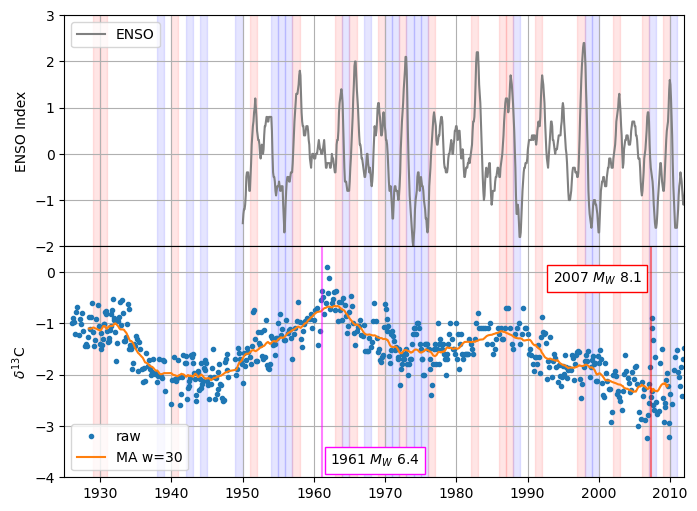

In [231]:
phase_color = {'W':'red', 'C':'blue'}
enso_phase_selected = enso_phase[(enso_phase['Year']>1925)&(enso_phase['Year']<df.index.max().year)&(enso_phase['Phase'] != 'N')]


fig, axes = plt.subplots(2,1, figsize=(8,6), sharex=True, gridspec_kw={'hspace':0})

ax = axes[1]
ax.plot(df['decimal_year'], df["d13c"], ".",label="raw")
#ax.plot(xs, ys, label="spline")
ax.plot(df['decimal_year'], df["MA_d13c"], label="MA w={:}".format(window))
ax.vlines(2007.25, -10,10, "red", alpha=0.5 )
ax.vlines(1961.2, -10,10, "magenta", alpha=0.5)


ax.text(1962.3, -3.75, r'1961 $M_W$ 6.4', 
        bbox=dict(facecolor="w", edgecolor="magenta"))

ax.text(1993.5, -0.2, r'2007 $M_W$ 8.1',  
        bbox=dict(facecolor="w", edgecolor="red"))

ax.legend(loc='lower left')
ax.set_ylabel(r'$\delta ^{13}$C')


for i, index in enumerate(enso_phase_selected.index):
    
    df_iter = enso_phase.loc[index]
    df_iter_next = enso_phase.loc[index+1]

    rect = matplotlib.patches.Rectangle((df_iter['Year'],-5),
                                        1, 10, 
                                        color = phase_color[df_iter['Phase']], 
                                        edgecolor=None, alpha=0.1) 
    ax.add_patch(rect)

ax.set_ylim(-4,0.5)
ax.grid()

ax2 = axes[0]

ax2.plot(enso['decimal_year'], enso["ENSO"], color='gray', label='ENSO')


for i, index in enumerate(enso_phase_selected.index):
    
    df_iter = enso_phase.loc[index]
    df_iter_next = enso_phase.loc[index+1]

    rect = matplotlib.patches.Rectangle((df_iter['Year'],-5),
                                        1, 10, 
                                        color = phase_color[df_iter['Phase']], 
                                        edgecolor=None, alpha=0.1) 
    ax2.add_patch(rect)

ax2.set_ylim(-2,3)
ax2.set_xlim(1925,2012)
ax2.grid()
ax2.legend()
ax2.set_ylabel("ENSO Index")


fig.savefig("ENSO_plot.png")

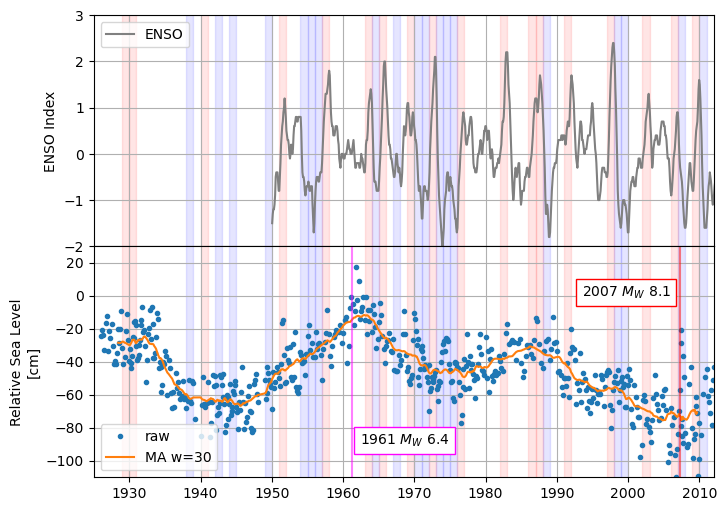

In [227]:
phase_color = {'W':'red', 'C':'blue'}
enso_phase_selected = enso_phase[(enso_phase['Year']>1925)&(enso_phase['Year']<df.index.max().year)&(enso_phase['Phase'] != 'N')]


fig, axes = plt.subplots(2,1, figsize=(8,6), sharex=True, gridspec_kw={'hspace':0})

ax = axes[1]
ax.plot(df['decimal_year'], df["sea_level"], ".",label="raw")
#ax.plot(xs, ys, label="spline")
ax.plot(df['decimal_year'], df["MA_sealevel"], label="MA w={:}".format(window))
ax.vlines(2007.25, -200,100, "red", alpha=0.5 )
ax.vlines(1961.2, -200,100, "magenta", alpha=0.5)


ax.text(1962.3, -90, r'1961 $M_W$ 6.4', 
        bbox=dict(facecolor="w", edgecolor="magenta"))

ax.text(1993.5, -0.2, r'2007 $M_W$ 8.1',  
        bbox=dict(facecolor="w", edgecolor="red"))

ax.legend(loc='lower left')
ax.set_ylabel("Relative Sea Level"+"\n"+"[cm]")


for i, index in enumerate(enso_phase_selected.index):
    
    df_iter = enso_phase.loc[index]
    df_iter_next = enso_phase.loc[index+1]

    rect = matplotlib.patches.Rectangle((df_iter['Year'],-200),
                                        1, 300, 
                                        color = phase_color[df_iter['Phase']], 
                                        edgecolor=None, alpha=0.1) 
    ax.add_patch(rect)
    
ax.set_ylim(-110,30)
ax.grid()

ax2 = axes[0]

ax2.plot(enso['decimal_year'], enso["ENSO"], color='gray', label='ENSO')


for i, index in enumerate(enso_phase_selected.index):
    
    df_iter = enso_phase.loc[index]
    df_iter_next = enso_phase.loc[index+1]

    rect = matplotlib.patches.Rectangle((df_iter['Year'],-5),
                                        1, 10, 
                                        color = phase_color[df_iter['Phase']], 
                                        edgecolor=None, alpha=0.1) 
    ax2.add_patch(rect)

ax2.set_ylim(-2,3)
ax2.set_xlim(1925,2012)
ax2.grid()
ax2.legend()
ax2.set_ylabel("ENSO Index")


fig.savefig("ENSO_plot_sealevel.png")

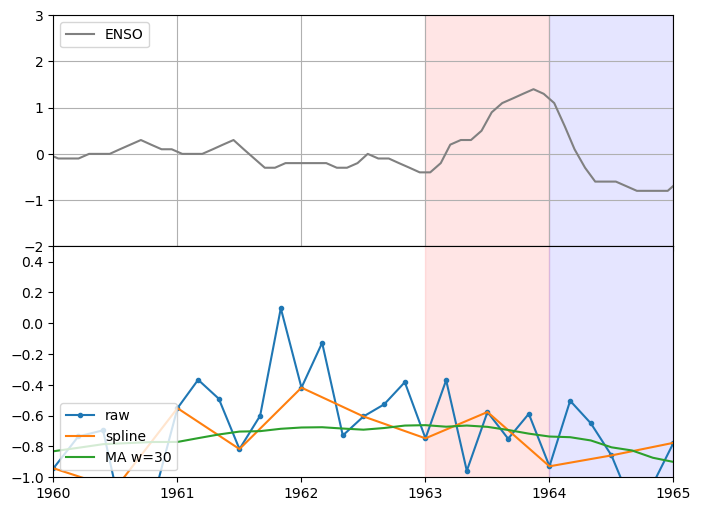

In [131]:
phase_color = {'W':'red', 'C':'blue'}
enso_phase_selected = enso_phase[(enso_phase['Year']>1925)&(enso_phase['Year']<df.index.max().year)&(enso_phase['Phase'] != 'N')]


fig, axes = plt.subplots(2,1, figsize=(8,6), sharex=True, gridspec_kw={'hspace':0})

ax = axes[1]
ax.plot(df['decimal_year'], df["d13c"], ".-",label="raw")
ax.plot(xs, ys, label="spline")
ax.plot(df['decimal_year'], df["MA_d13c"], label="MA w={:}".format(window))
ax.legend(loc='lower left')


for i, index in enumerate(enso_phase_selected.index):
    
    df_iter = enso_phase.loc[index]
    df_iter_next = enso_phase.loc[index+1]

    rect = matplotlib.patches.Rectangle((df_iter['Year'],-5),
                                        1, 10, 
                                        color = phase_color[df_iter['Phase']], 
                                        edgecolor=None, alpha=0.1) 
    ax.add_patch(rect)

ax.set_ylim(-1,0.5)

ax2 = axes[0]

ax2.plot(enso['decimal_year'], enso["ENSO"], color='gray', label='ENSO')

enso_phase_selected = enso_phase[(enso_phase['Year']>1925)&(enso_phase['Year']<1991)&(enso_phase['Phase'] != 'N')]

for i, index in enumerate(enso_phase_selected.index):
    
    df_iter = enso_phase.loc[index]
    df_iter_next = enso_phase.loc[index+1]

    rect = matplotlib.patches.Rectangle((df_iter['Year'],-5),
                                        1, 10, 
                                        color = phase_color[df_iter['Phase']], 
                                        edgecolor=None, alpha=0.1) 
    ax2.add_patch(rect)

ax2.set_ylim(-2,3)
ax2.set_xlim(1960, 1965)
ax2.grid()
ax2.legend()


In [133]:
#https://www.isc.ac.uk/cgi-bin/web-db-run?event_id=17289975&out_format=IMS1.0&request=COMPREHENSIVE